<a href="https://colab.research.google.com/github/dornalagopireddy/DATA-SCIENCE/blob/main/Data_Science_Job_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ABOUT DATASET



Data Science Job Salaries Dataset Contains 11 Columns
> Indented block

1.   work_year:The year salary was paid
2.   experience_level:The experience level in the job during the year
3.employment_type:The type of employement for the role
4.job_title:The role worked in during the year
5.salary:The total gross salary amount paid.
6.remote_ratio:the overall amount of work done remotely
7.company_size:The median number of people that worked for the company during the year






In [2]:
#install required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load the dataset
data=pd.read_csv("/content/Data Science Jobs Salaries.csv")

In [8]:
#visualize the first five rows in the data using the head function
data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,salary_in_inr,employee_residence,remote_ratio,company_location,company_size
0,2021,EN,FT,Data Science Consultant,54000,EUR,64369,4911354.7,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,5221056.4,GR,100,US,L
2,2021,EX,FT,Head of Data Science,85000,USD,85000,6485500.0,RU,0,RU,M
3,2021,EX,FT,Head of Data,230000,USD,230000,17549000.0,RU,50,RU,L
4,2021,EN,FT,Machine Learning Engineer,125000,USD,125000,9537500.0,US,100,US,S


In [9]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,salary_in_inr,employee_residence,remote_ratio,company_location,company_size
240,2020,SE,FT,Data Scientist,412000,USD,412000,31435600.0,US,100,US,L
241,2021,MI,FT,Principal Data Scientist,151000,USD,151000,11521300.0,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,8011500.0,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,7630000.0,US,100,US,L
244,2021,SE,FT,Data Science Manager,7000000,INR,94917,7242167.1,IN,50,IN,L


DATA PREPROCESSING

In [10]:
#first thing we should know what type of data do we have
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           245 non-null    int64  
 1   experience_level    245 non-null    object 
 2   employment_type     245 non-null    object 
 3   job_title           245 non-null    object 
 4   salary              245 non-null    int64  
 5   salary_currency     245 non-null    object 
 6   salary_in_usd       245 non-null    int64  
 7   salary_in_inr       245 non-null    float64
 8   employee_residence  245 non-null    object 
 9   remote_ratio        245 non-null    int64  
 10  company_location    245 non-null    object 
 11  company_size        245 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 23.1+ KB


In [11]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'salary_in_inr',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [12]:
#print the shape of the data
print(f'In the data rows is{data.shape[0]} and columns is {data.shape[1]}')

In the data rows is245 and columns is 12


In [15]:
#checking the null values in the data
data.isnull().sum().sort_values(ascending=False)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
salary_in_inr         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [17]:
#summarize the each dataframe index
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,245.0,2.020731e+03,4.445499e-01,2020.0,2020.0,2021.0,2021.0,2021.0
salary,245.0,5.025418e+05,2.276230e+06,4000.0,60000.0,103000.0,174000.0,30400000.0
salary_in_usd,245.0,9.986801e+04,8.398333e+04,2876.0,45896.0,81000.0,130000.0,600000.0
salary_in_inr,245.0,7.619929e+06,6.407928e+06,219438.8,3501864.8,6180300.0,9919000.0,45780000.0
remote_ratio,245.0,6.918367e+01,3.759342e+01,0.0,50.0,100.0,100.0,100.0


<ipython-input-22-aa6285ba5f0b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


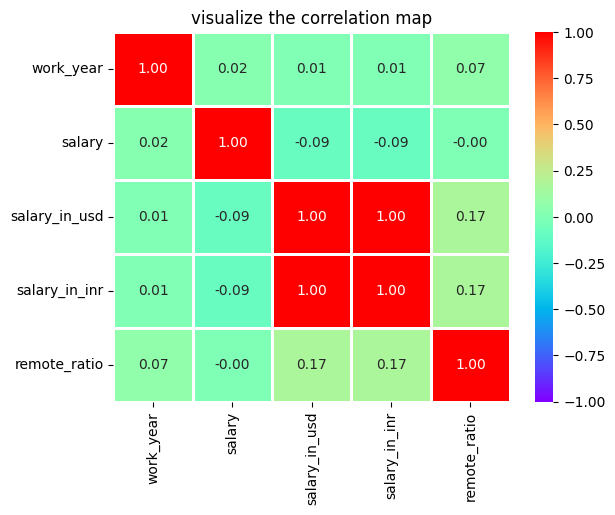

In [22]:
  #visualize the correlation map
cor=data.corr()
sns.heatmap(cor,annot=True,cmap='rainbow',fmt='.2f',linewidths=1,vmin=-1,vmax=1)
plt.title("visualize the correlation map")
plt.show()

**Observation**
* In the above correlation map it is clearly understand some columns are negative correlation
* Salary column negative correlation with salary_in_usd,salary_in_inr and remote_ratio
* salary_in_usd,salary_in_inr and remote_ratio columns are negative correlation with salary




**EXPLORE DATA ANALYSIS(EDA PROCESS)**
1.   Identify which year most of the data scientist salaries posted using the bar chart.
2.   Identify the which type of the people have in the data set using the pie chart
3.Understanding the salary in usd with experience wise using the histogram.
4.Which type of company pay more salary as a data scientist.
5.Find the sum of the salary with Remote waise





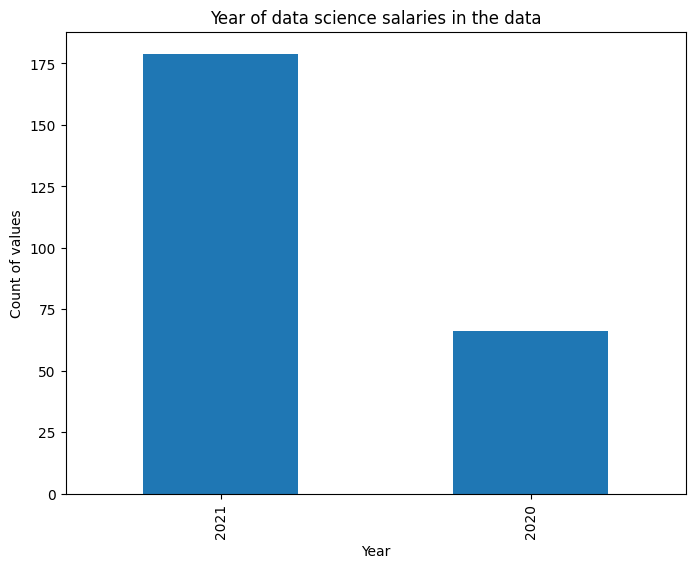

In [41]:
#Identify which year most of the data scientist salaries posted using the bar chart.
data['work_year'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="Year of data science salaries in the data",column='salary')
plt.xlabel("Year")
plt.ylabel("Count of values")
plt.show()

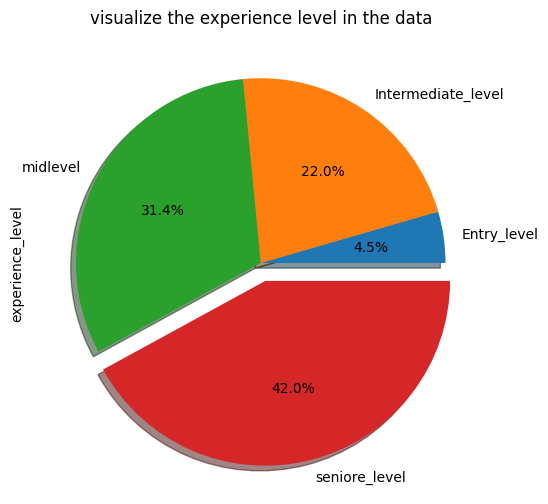

In [62]:
#Create pie chart understand what experience people in the company
data['experience_level'].value_counts().sort_values(ascending=True)\
.plot(kind='pie',figsize=(8,6),title="visualize the experience level in the data",labels=['Entry_level','Intermediate_level','midlevel','seniore_level'],autopct='%1.1f%%',shadow=True,explode=[0.00,0,0,0.1])
plt.show()

**Observation**

1.   In the year 2021 most of the data scientist salaries posted compare to the other year,\
2.  In 2020 we get the less data scientist salaries##Pie chart
3.In the pie chart we observe most of the company hire seniore roles as data scientist means 42% employes are seniore level data scientist
4.Only 4.5% people recurite the entry level data scientist




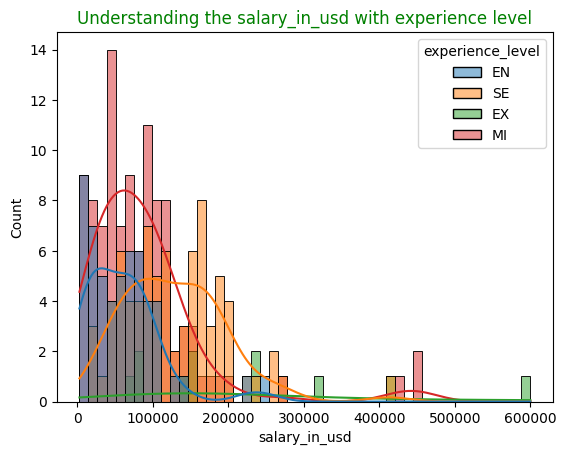

In [72]:
#create histogram to understanding salary with Experience wise
sns.histplot(data=data,x='salary_in_usd',hue='experience_level',kde=True,bins=50)
plt.title("Understanding the salary_in_usd with experience level",color='green')
plt.show()



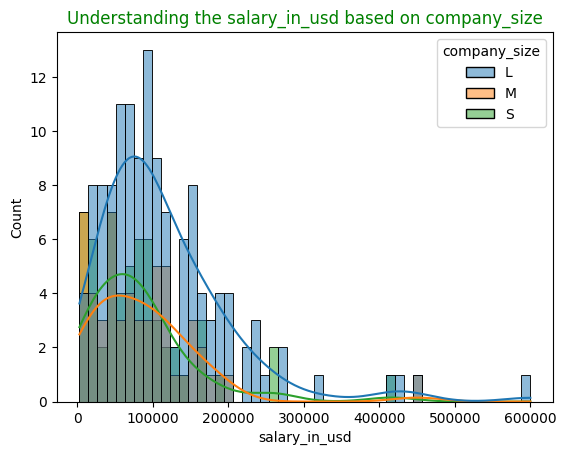

In [73]:
#Let us create a histogram with company wise paying the more salary as data scientist
sns.histplot(data=data,x='salary_in_usd',hue='company_size',kde=True,bins=50)
plt.title("Understanding the salary_in_usd based on company_size",color='green')
plt.show()



Text(0.5, 1.0, 'Average salary paying the large company with employment waise')

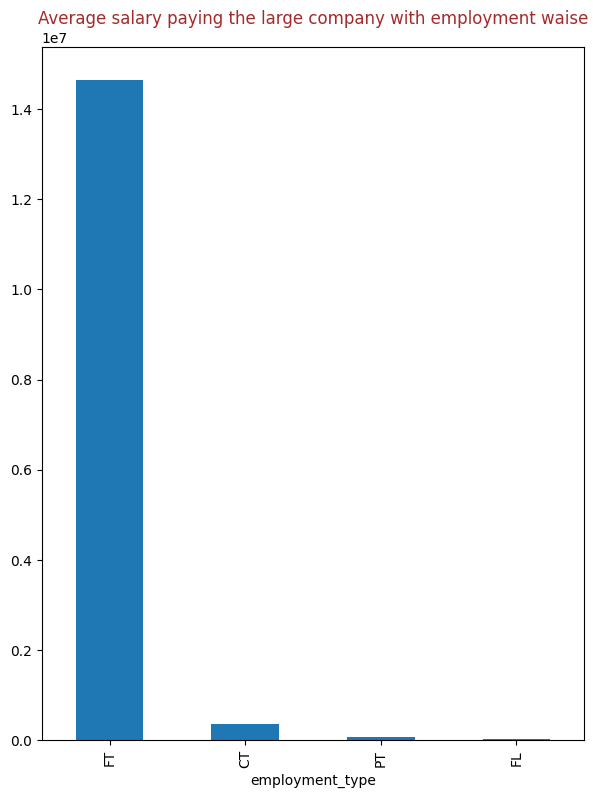

In [90]:
#Find the Average salary paying the large company with employement waise
large=data['company_size']=='L'
data.loc[large].groupby(['employment_type'])['salary_in_usd'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(7,9),title="Top10 high paying jobs in the medium company")
plt.title("Average salary paying the large company with employment waise",color="brown")

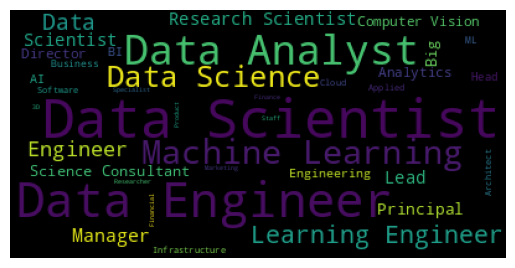

In [92]:
#we import wordcloud from the wordcloud
from wordcloud import WordCloud
t3=' '.join(data['job_title'])
wc2=WordCloud(mode='RGB',background_color='black').generate(t3)
#generate plot
plt.imshow(wc2)
plt.axis("off")
plt.show()